## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
23,20/03/2020,20/03/2020 00:00,1020,506,106,361,2,29,3,1,...,506.0,514.0,1,2,2,0,1,0,0,0
24,21/03/2020,21/03/2020 00:00,1280,644,137,448,3,31,3,5,...,649.0,631.0,4,4,3,0,1,0,0,0
25,22/03/2020,22/03/2020 00:00,1600,825,180,534,5,35,4,7,...,821.0,779.0,5,4,4,0,1,0,0,0
26,23/03/2020,23/03/2020 00:00,2060,1007,238,737,5,42,11,9,...,1080.0,980.0,9,5,8,0,1,0,0,0
27,24/03/2020,24/03/2020 00:00,2362,1130,293,852,6,46,12,11,...,1229.0,1133.0,9,11,8,0,1,1,0,0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 56 columns):
data                                 28 non-null object
data_dados                           28 non-null object
confirmados                          28 non-null int64
confirmados_arsnorte                 28 non-null int64
confirmados_arscentro                28 non-null int64
confirmados_arslvt                   28 non-null int64
confirmados_arsalentejo              28 non-null int64
confirmados_arsalgarve               28 non-null int64
confirmados_acores                   28 non-null int64
confirmados_madeira                  28 non-null int64
confirmados_estrangeiro              13 non-null float64
confirmados_novos                    28 non-null int64
recuperados                          28 non-null int64
obitos                               28 non-null int64
internados                           20 non-null float64
internados_uci                       11 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,13.000000,28.000000,...,6.000000,6.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.000000,28.0,28.0
mean,405.571429,197.857143,44.178571,146.071429,0.892857,10.428571,1.50000,1.250000,6.923077,84.357143,...,779.166667,738.666667,1.000000,0.964286,1.035714,0.0,0.178571,0.035714,0.0,0.0
std,664.161205,325.303928,78.629018,235.600875,1.770944,14.299517,3.08521,2.951773,3.499084,124.585302,...,327.906948,281.261918,2.553139,2.411118,2.219145,0.0,0.390021,0.188982,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,390.000000,395.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
25%,5.500000,2.750000,1.000000,1.750000,0.000000,0.000000,0.00000,0.000000,5.000000,2.000000,...,541.750000,543.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
50%,50.000000,31.500000,2.500000,13.500000,0.000000,2.500000,0.00000,0.000000,9.000000,13.500000,...,735.000000,705.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
75%,496.500000,219.250000,56.750000,195.750000,0.500000,15.750000,1.50000,0.250000,9.000000,123.500000,...,1015.250000,929.750000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0
max,2362.000000,1130.000000,293.000000,852.000000,6.000000,46.000000,12.00000,11.000000,11.000000,460.000000,...,1229.000000,1133.000000,9.000000,11.000000,8.000000,0.0,1.000000,1.000000,0.0,0.0


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-27,27/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-28,28/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-29,29/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-03-01,01/03/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


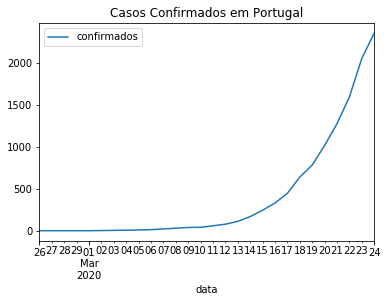

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

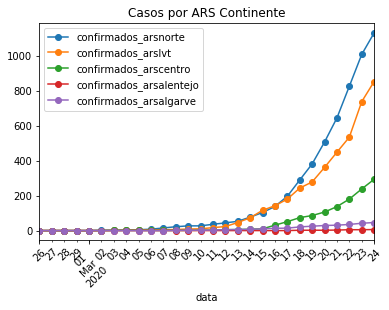

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

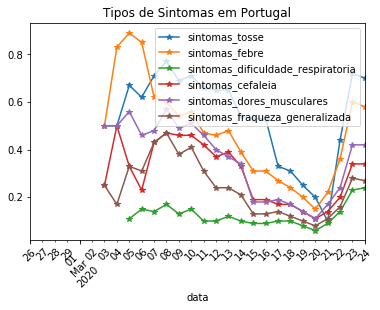

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

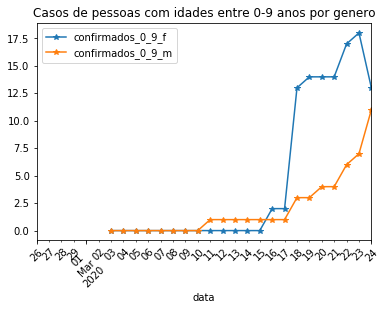

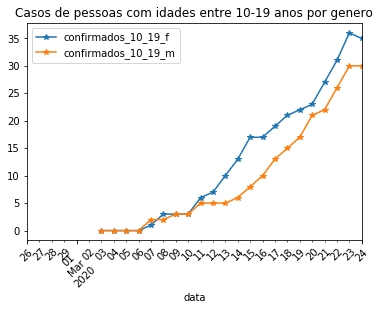

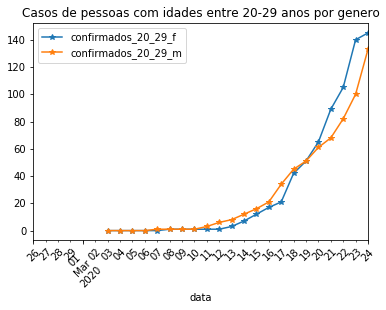

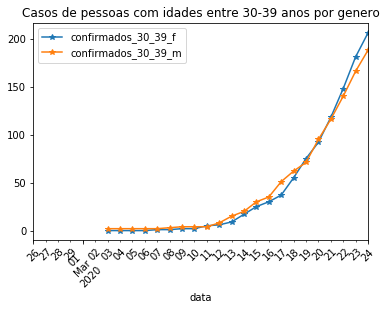

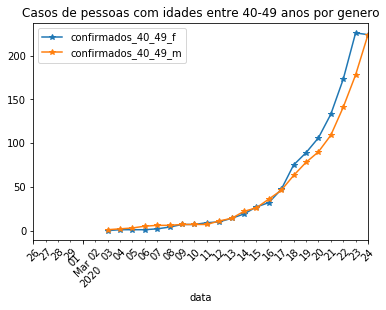

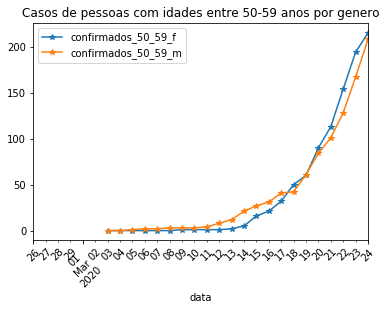

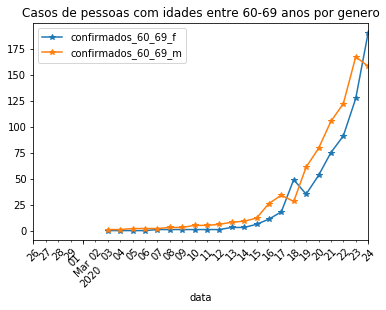

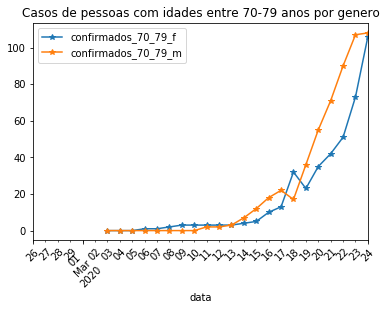

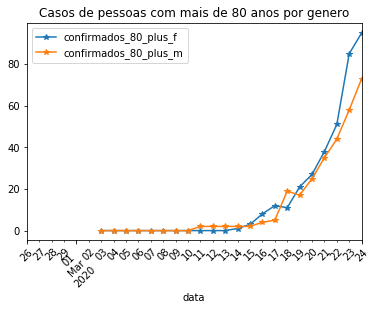

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


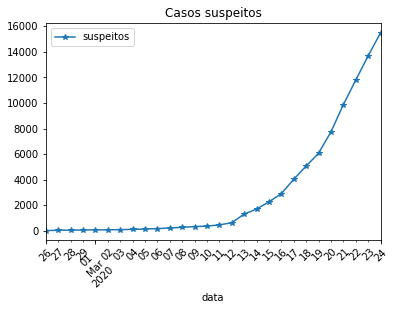

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

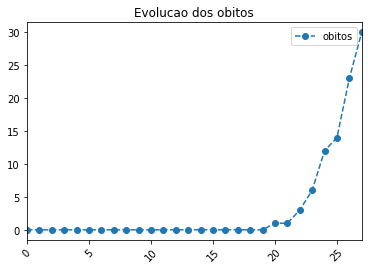

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060 2362]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:22]), x[:22])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2560.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           1.38e-22
Time:                        20:19:06   Log-Likelihood:                 6.6711
No. Observations:                  22   AIC:                            -9.342
Df Residuals:                      20   BIC:                            -7.160
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2163      0.077     15.744      0.000       1.055       1.377
x1             0.3187      0.006     50.599      0.000       0.306       0.332
==============================================================================
Omnibus:                        7.536   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.131
Skew:                          -0.998   Prob(JB):                       0.0769
Kurtosis:                       4.270   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

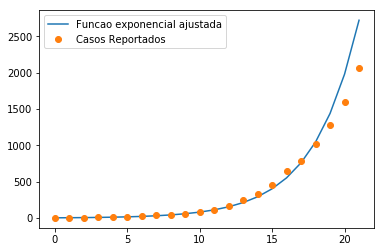

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:22])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:22], "o", label="Casos Reportados")
plt.legend()
plt.show()